In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

with open('attention_vis.pickle', 'rb') as handle:
    atten_vis = pickle.load(handle)

In [5]:
atten_vis[0]

{'query_rel': [2],
 '1layer': {'attention_score': [[0.614480197429657],
   [0.6092017889022827],
   [0.614480197429657],
   [0.5666331648826599],
   [0.6006461381912231],
   [0.614480197429657],
   [0.614480197429657],
   [0.5613800883293152],
   [0.614480197429657],
   [0.614480197429657],
   [0.5637611746788025],
   [0.614480197429657],
   [0.5637611746788025],
   [0.614480197429657],
   [0.614480197429657],
   [0.614480197429657],
   [0.625502347946167],
   [0.5734713673591614],
   [0.5585007071495056],
   [0.5459345579147339],
   [0.5124858617782593],
   [0.5124858617782593],
   [0.625502347946167],
   [0.5428785085678101],
   [0.5124858617782593],
   [0.625502347946167],
   [0.625502347946167],
   [0.5428785085678101],
   [0.5996460318565369],
   [0.5462955832481384],
   [0.625502347946167],
   [0.5585007071495056],
   [0.625502347946167],
   [0.7546728253364563]],
  'rel': [2,
   6,
   2,
   28,
   18,
   2,
   2,
   42,
   2,
   2,
   4,
   2,
   4,
   2,
   2,
   2,
   3,
   21

In [62]:
query_set = set()
target_set = set()
select_query = []
for idx in tqdm(range(100)):
    query_rel = atten_vis[idx]['query_rel'][0]
    if query_rel in query_set:
        continue
    selected_index = (np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1) > 0.5)
    if np.sum(selected_index) <= 2:
        continue
    selected_rels= np.array(atten_vis[idx]['3layer']['rel'])[selected_index]
    # plt.plot(np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1))
    query_set.add(query_rel)
    target_set.update(selected_rels)
    select_query.append(idx)
    # print(query_rel)
    # print(selected_rels)

100%|██████████| 100/100 [00:00<00:00, 584.77it/s]


In [63]:
len(target_set)

1

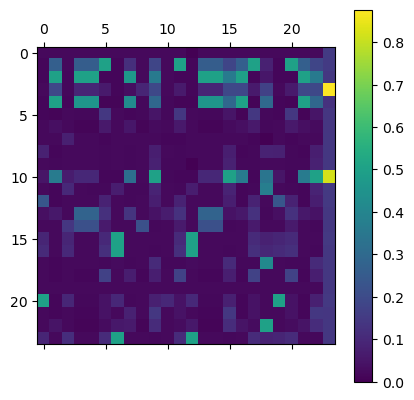

In [42]:
import random
select_query_rel = list(query_set)
# random_select = random.sample(list(target_set), 24)
random_select = np.array(list(target_set))[-24:]
target_max_rel = np.max(random_select)
target_rel_to_idx = np.zeros(target_max_rel + 1, dtype=np.int32)
target_rel_to_idx[random_select] = np.arange(24)

def first_in_array(source, target):
    visitied = set()
    selected_index = []
    exist_target_rel = []
    for idx, item in enumerate(source):
        if item in target and item not in visitied:
            visitied.add(item)
            selected_index.append(idx)
            exist_target_rel.append(item)
    return selected_index, exist_target_rel

vis_mat = []

for idx in select_query:
    # get the target rel
    masks, exist_target_rel = first_in_array(atten_vis[idx]['3layer']['rel'], random_select)
    # print(masks)
    # print(len(exist_target_rel))
    masks_value = np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1)[masks]
    # print(masks_value.shape)
    row_value = np.zeros(24)
    # print(target_rel_to_idx[exist_target_rel].shape)
    row_value[target_rel_to_idx[exist_target_rel]] = masks_value
    vis_mat.append(row_value)
plt.matshow(np.array(vis_mat))
plt.colorbar()

In [44]:
with open('id2entity.pickle', 'rb') as handle:
    id2relation = pickle.load(handle)

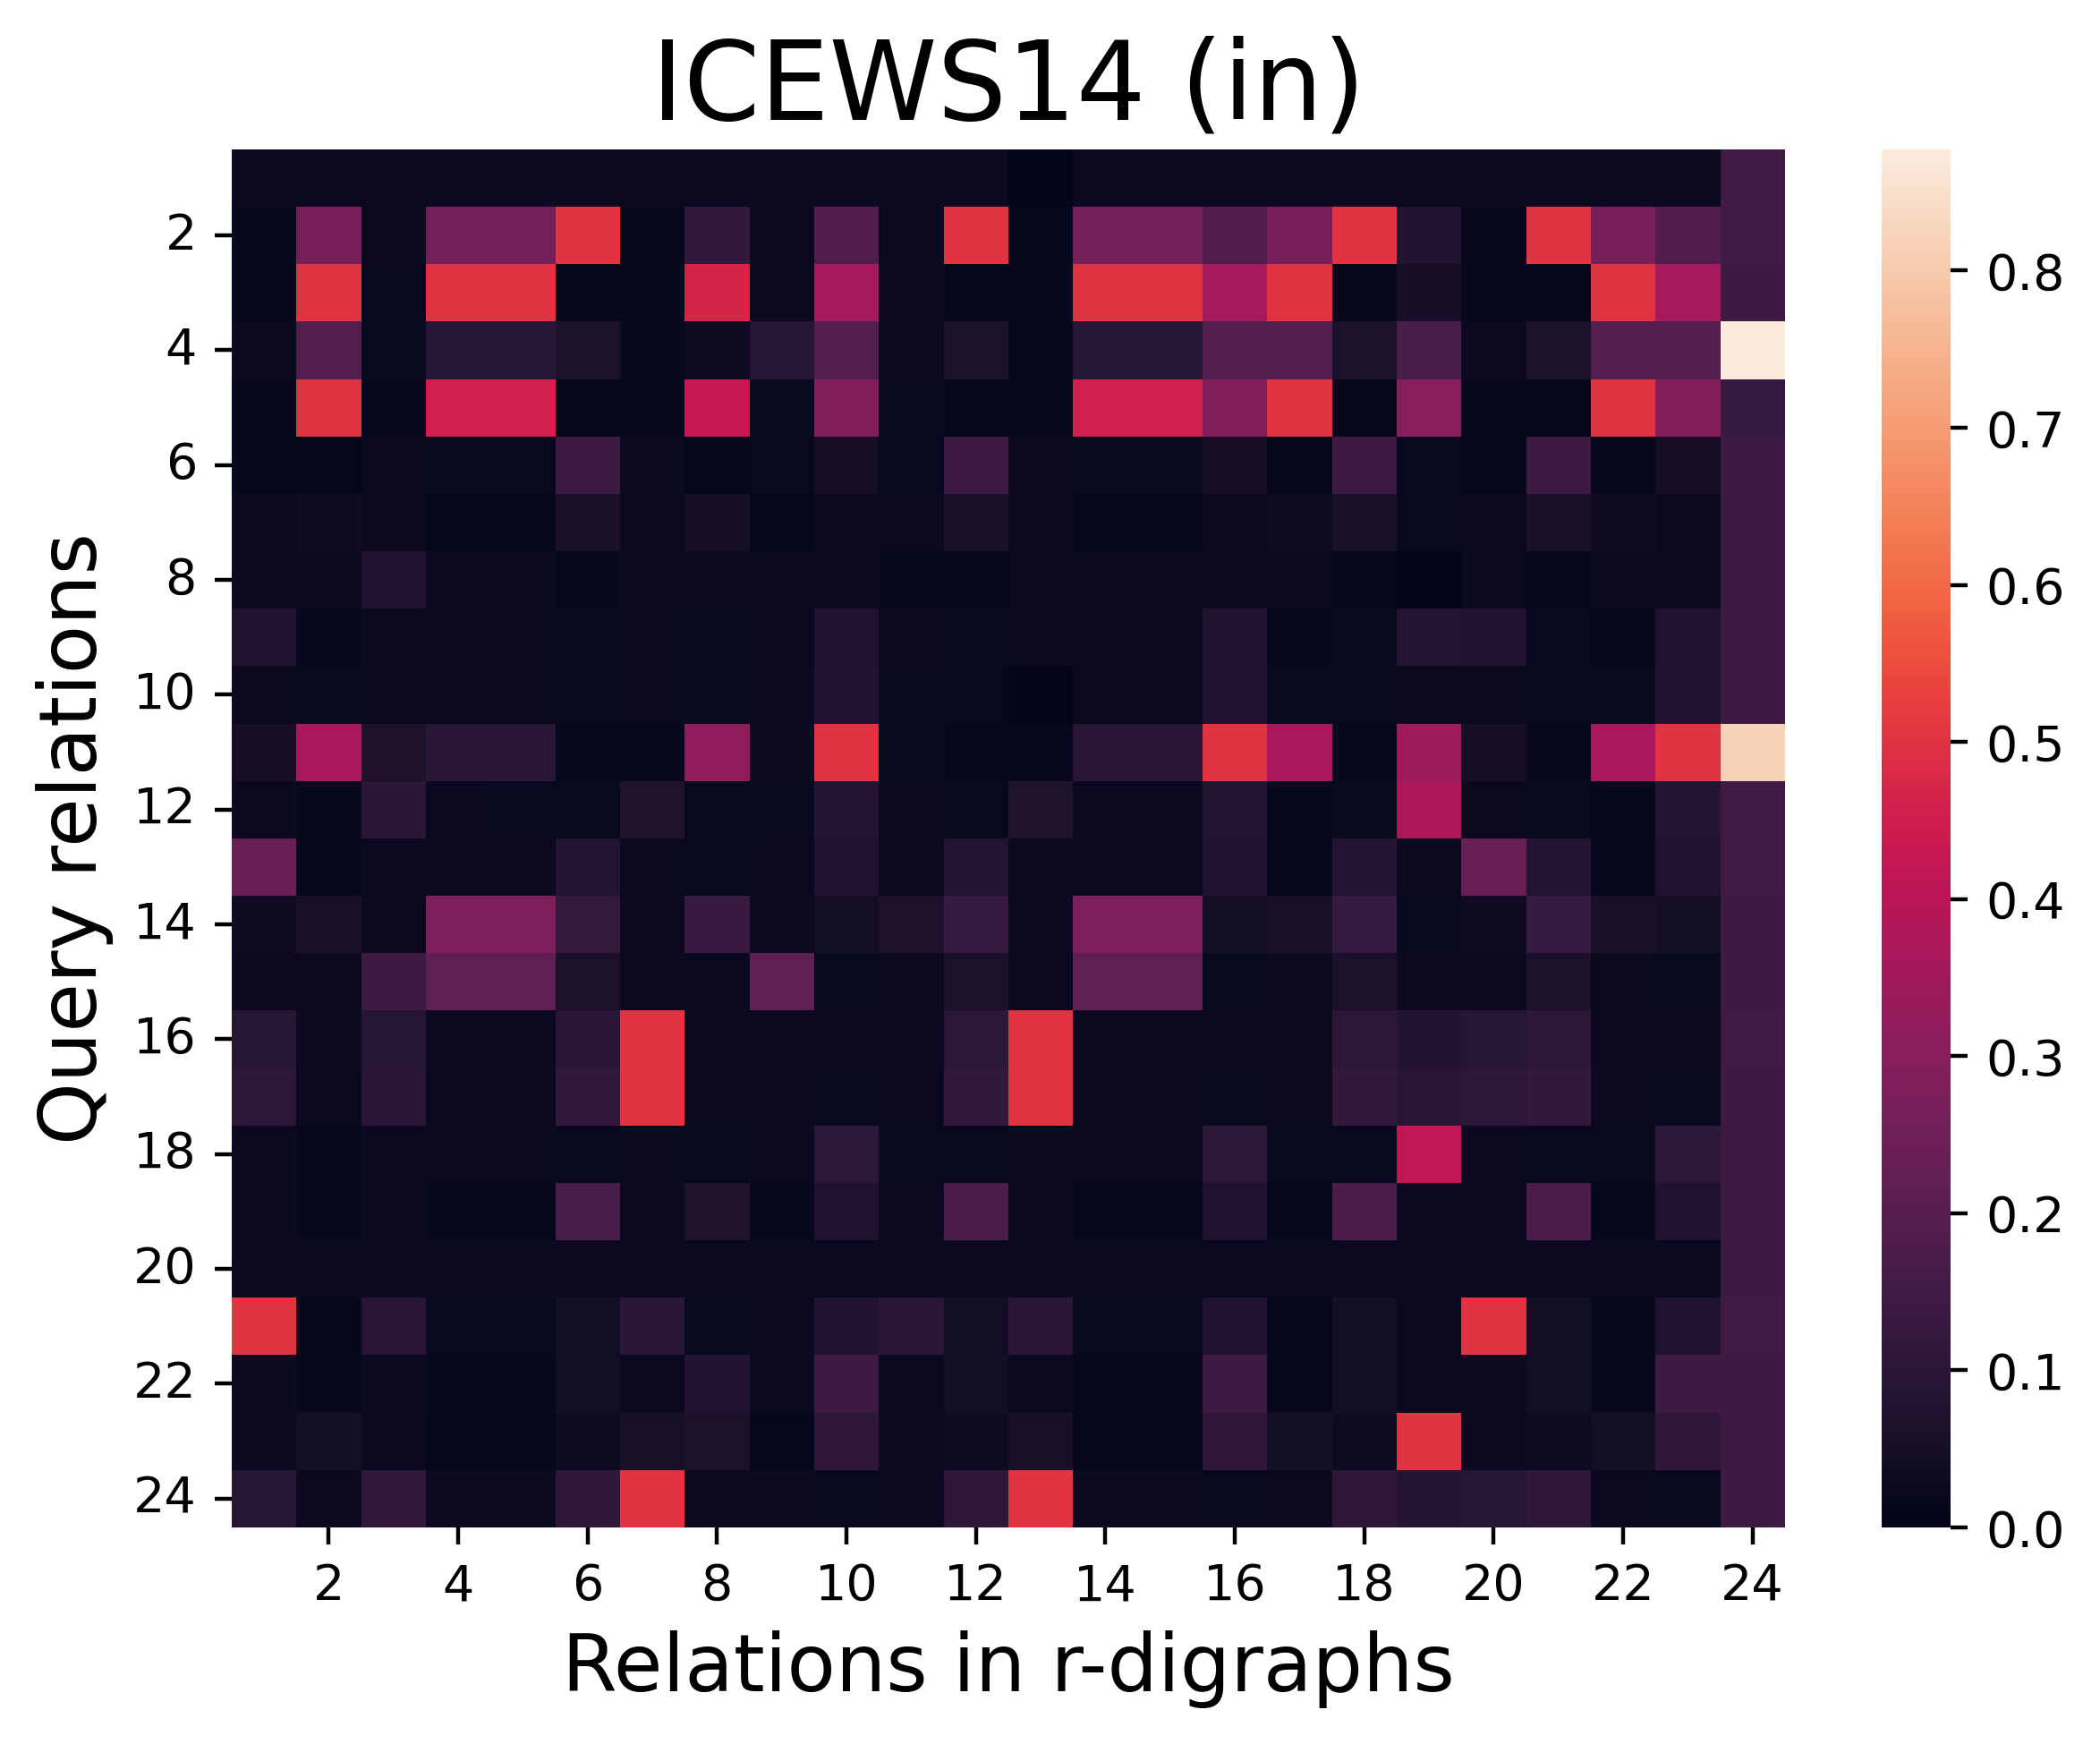

In [47]:
from matplotlib.font_manager import FontProperties
import seaborn as sns

font = FontProperties('sans')
font.set_size(10)
font_axis = {'family' : 'sans',
'weight' : 'light',
'size'  : 16,
}

font_axis2 = {'family' : 'Times New Roman',
'weight' : 'light',
'size'  : 22,
}

fig=plt.figure(dpi=400, figsize=(7,5))
sns.heatmap(np.array(vis_mat))

x_pos = np.arange(1, 24, 2) + 0.5
y_pos = np.arange(1, 24, 2) + 0.5

labels = np.arange(1, 24, 2) + 1

plt.xticks(x_pos, labels, rotation=0, fontproperties=font)
plt.yticks(y_pos, labels, rotation=0, fontproperties=font)

plt.xlabel('Relations in r-digraphs',font_axis)
plt.ylabel('Query relations',font_axis)
plt.title('ICEWS14 (in)', font_axis2)
plt.savefig("ICEWS14 (in).pdf", bbox_inches='tight', pad_inches=0.02)
plt.show()

In [68]:
np.array(vis_mat)[2, 13]

0.5006341338157654

In [67]:
print(id2relation[select_query_rel[2]])
print(id2relation[random_select[13]])

make an appeal or request
appeal for easing of economic sanctions, boycott, or embargo


In [70]:
for rel_id in select_query_rel: 
    print(id2relation[rel_id])

make statement
consult
make an appeal or request
express intent to meet or negotiate
host a visit
make a visit
conduct suicide, car, or other non-military bombing
arrest, detain, or charge with legal action
praise or endorse
attempt to assassinate
criticize or denounce
accuse
demand change in leadership
use conventional military force
demand
express intent to engage in diplomatic cooperation (such as policy support)
engage in diplomatic cooperation
sign formal agreement
investigate
reject
make optimistic comment
appeal for diplomatic cooperation (such as policy support)
return, release person(s)
confiscate property
